# **BITCOIN PRICE PREDICTION USING MACHINE LEARNING**

## Multiple Linear Regression

Import the Required Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib as jl
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Reading the Dataset using pandas ,paste the path where you stored in datasetfile in your system.

In [2]:
dataset = pd.read_csv("Dataset.csv")

Dataset Shape

In [3]:
dataset.shape

(3744, 7)

Dataset Describing

In [4]:
dataset.describe()

,Price,Open,High,Low
count,3744.000000,3744.000000,3744.000000,3744.000000
mean,8709.264931,8696.973291,8943.827778,8423.173932
std,14951.761124,14939.928071,15353.643871,14472.255066
min,4.200000,4.200000,4.400000,3.900000
25%,276.250000,275.425000,284.500000,268.475000
50%,1044.550000,1043.150000,1068.800000,1004.500000
75%,9082.025000,9080.475000,9266.825000,8806.725000
max,67527.900000,67528.700000,68990.600000,66334.900000


Dropping Unnecessary Columns

In [5]:
dataset = dataset.drop(['Date','Change %'],axis=1)

In [6]:
dataset.shape

(3744, 5)

Dataset Describing

In [7]:
dataset.describe()

,Price,Open,High,Low
count,3744.000000,3744.000000,3744.000000,3744.000000
mean,8709.264931,8696.973291,8943.827778,8423.173932
std,14951.761124,14939.928071,15353.643871,14472.255066
min,4.200000,4.200000,4.400000,3.900000
25%,276.250000,275.425000,284.500000,268.475000
50%,1044.550000,1043.150000,1068.800000,1004.500000
75%,9082.025000,9080.475000,9266.825000,8806.725000
max,67527.900000,67528.700000,68990.600000,66334.900000


In [8]:
X=dataset[['Open','Low','High']]
Y=dataset['Price']

Splitting the Dataset into Traing and Testing Set

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

Model Fitting

In [10]:
lr_model = LinearRegression()
lr_model.fit(X_train,Y_train)

LinearRegression()

Intercepts and Coefficients

In [11]:
print("Intercept: ", lr_model.intercept_)
print("Coefficients:")
list(zip(X, lr_model.coef_))

Intercept:  3.682753442300964
Coefficients:


[('Open', np.float64(-0.5430728086439843)),
 ('Low', np.float64(0.6454893447436105)),
 ('High', np.float64(0.8933086489532557))]

In [12]:
pred_lr_model = lr_model.predict(X_test)
mlr_diff = pd.DataFrame({'Actual value': Y_test, 'Predicted value': pred_lr_model})
mlr_diff.head()

,Actual value,Predicted value
825,7321.5,7332.891018
1982,682.3,685.741036
3567,6.3,9.980604
668,9527.6,9621.242607
598,11390.4,11400.837734


Metrices Calculation

In [13]:
meanAbErr = metrics.mean_absolute_error(Y_test, pred_lr_model)
meanSqErr = metrics.mean_squared_error(Y_test, pred_lr_model)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(Y_test, pred_lr_model))
print('R squared: {:.2f}'.format(lr_model.score(X,Y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print("Training Model Accuracy: {:.3f}%".format(lr_model.score(X_train,Y_train)*100))

R squared: 99.96
Mean Absolute Error: 113.26661229816666
Mean Square Error: 93053.78671346133
Root Mean Square Error: 305.0471876832523
Training Model Accuracy: 99.965%


Model Accuracy

In [14]:
print("Testing Model Accuracy: {:.3f}%".format(lr_model.score(X_test,Y_test)*100))

Testing Model Accuracy: 99.956%


Plotting **'Open'** vs **'Price'**

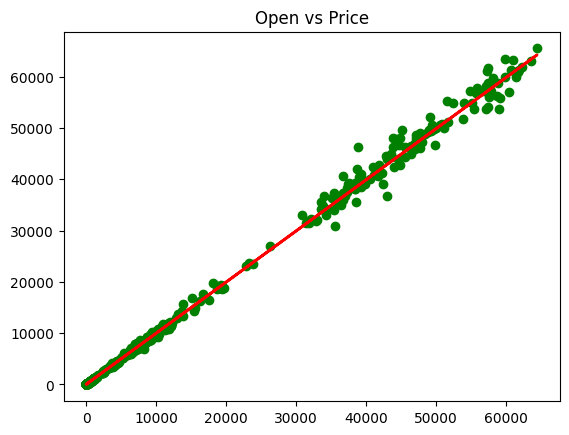

In [15]:
x = dataset[['Open']]
y = dataset['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)
open=LinearRegression()
open.fit(x_train,y_train)
open.score(x_train,y_train)
predict=open.predict(x_test)
plt.scatter(x_test,y_test,color="green")
plt.title("Open vs Price")
plt.plot(x_test,predict,color="red",linewidth=2)

Plotting **'Low'** vs **'Price'**

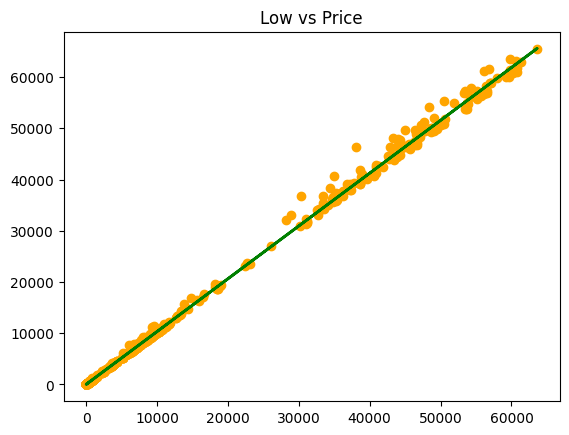

In [16]:
x = dataset[['Low']]
y = dataset['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)
low=LinearRegression()
low.fit(x_train,y_train)
low.score(x_train,y_train)
predict=low.predict(x_test)
plt.title("Low vs Price")
plt.scatter(x_test,y_test,color="orange")
plt.plot(x_test,predict,color="green",linewidth=2)

Plotting **'High'** vs **'Price'**

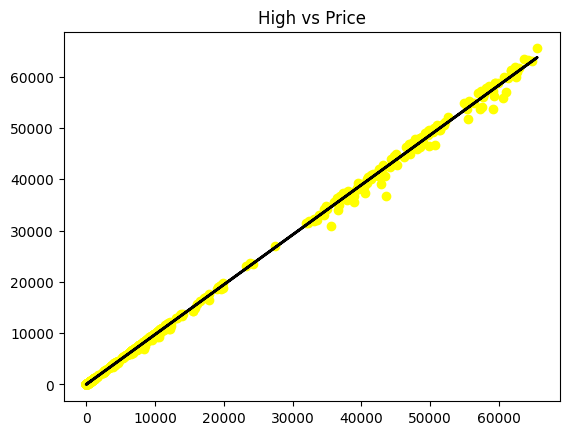

In [17]:
x = dataset[['High']]
y = dataset['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)
high=LinearRegression()
high.fit(x_train,y_train)
high.score(x_train,y_train)
predict=high.predict(x_test)
plt.title("High vs Price")
plt.scatter(x_test,y_test,color="yellow")
plt.plot(x_test,predict,color="black",linewidth=2)

Model Prediction

In [31]:
n=int(input("Number of Inputs:"))
x_new=[]
for i in range(n):
  a=float(input("Enter the Open Price:"))
  b=float(input("Enter the Low Price:"))
  c=float(input("Enter the High Price:"))
  x_new.append([a,b,c])
y_new=lr_model.predict(x_new)
print("Prediction of the Closing Price:",y_new)

Prediction of the Closing Price: [65319.80675521]


/home/sachin/Documents/clg/bitcoin-price-prediction/.venv/lib64/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
